# Answering our question... has the crypto bull market started?

### BTC Price prediction model with LSTM

## What we are going to do:

- Load dataset from yahoo
- Data feature engineering
- Normalize data
- Train, test and evaluate the model
- Plot predictions to actual price
- Predict the next 30 days using the last 1000 historical values
- Save trained model

### Lets find out!

*Not financial advise


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Collect historical BTC data
btc_ticker = yf.Ticker("BTC-USD")
btc = btc_ticker.history(period="max")
btc.index = pd.to_datetime(btc.index)

In [3]:
# Use the 'Close' prices as the target variable
data = btc[['Close']].values

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
# Define sequence length (e.g., 30 days of historical data)
sequence_length = 30

# Create sequences for training without slicing
X, y = [], []

# Create sequences for training
for i in range(len(data) - sequence_length):
    sequence = []
    for j in range(sequence_length):
        sequence.append(data[i + j])
    X.append(sequence)
    y.append(data[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make future predictions (you will need historical data for this)
# future_data = ...  # Prepare historical data for future predictions
# predicted_future = model.predict(future_data)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test Set): {mse}")

Epoch 1/50
83/83 [==============================] - 3s 13ms/step - loss: 0.0067
Epoch 2/50
83/83 [==============================] - 1s 12ms/step - loss: 6.0970e-04
Epoch 3/50
83/83 [==============================] - 1s 12ms/step - loss: 4.9850e-04
Epoch 4/50
83/83 [==============================] - 1s 14ms/step - loss: 4.5941e-04
Epoch 5/50
83/83 [==============================] - 1s 14ms/step - loss: 4.0648e-04
Epoch 6/50
83/83 [==============================] - 1s 13ms/step - loss: 4.3553e-04
Epoch 7/50
83/83 [==============================] - 1s 14ms/step - loss: 3.6889e-04
Epoch 8/50
83/83 [==============================] - 1s 12ms/step - loss: 3.8665e-04
Epoch 9/50
83/83 [==============================] - 1s 13ms/step - loss: 3.4422e-04
Epoch 10/50
83/83 [==============================] - 1s 12ms/step - loss: 3.5731e-04
Epoch 11/50
83/83 [==============================] - 1s 12ms/step - loss: 3.7990e-04
Epoch 12/50
83/83 [==============================] - 1s 12ms/step - loss: 3.09

In [15]:
# Save the trained model to a file
model.save("btc_price_prediction_model.h5")

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
loaded_model = load_model("btc_price_prediction_model.h5")

In [9]:
# Make predictions on the entire dataset
y_pred = model.predict(X)

# Inverse transform the scaled values to get the actual BTC prices
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y)

104/104 [==============================] - 1s 5ms/step


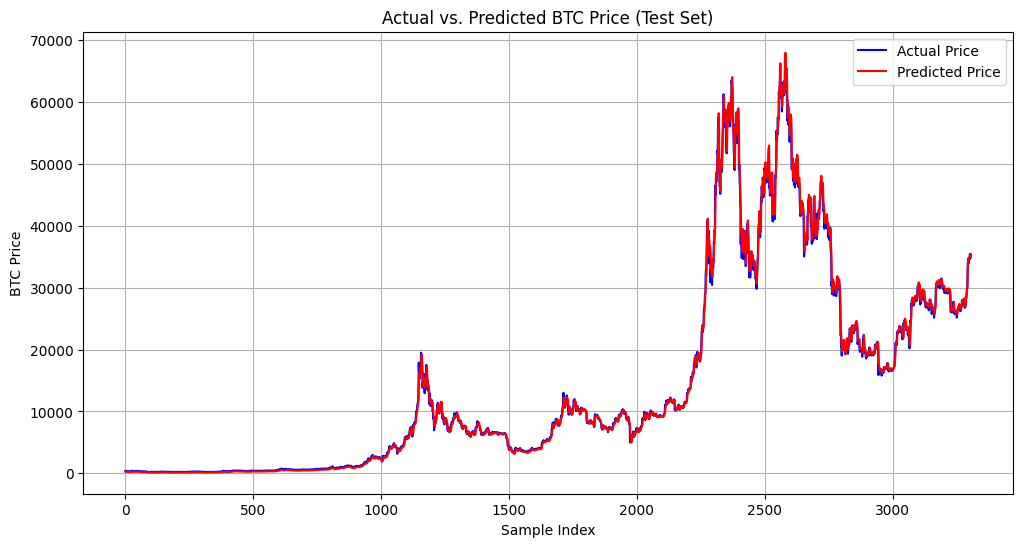

In [10]:
# Plot the actual and predicted prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')

plt.xlabel('Sample Index')
plt.ylabel('BTC Price')
plt.title('Actual vs. Predicted BTC Price (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Get the last 1000 days of historical data
last_1000_days = data[-1000:]

# Create a list to store the predicted values for the next 30 days
predicted_future = []

# Make predictions for the next 30 days
for _ in range(30):
    # Reshape the input data to match the model's input shape
    input_data = last_1000_days[-sequence_length:].reshape(1, sequence_length, 1)
    
    # Use the model to make a prediction for the next day
    next_day_prediction = model.predict(input_data)[0][0]
    
    # Append the prediction to the list of predicted values
    predicted_future.append(next_day_prediction)
    
    # Update the input data for the next iteration
    last_1000_days = np.append(last_1000_days, next_day_prediction)


1/1 [==============================] - 0s 23ms/step


In [12]:
# Inverse transform the scaled values to get the actual BTC prices
predicted_future = scaler.inverse_transform(np.array(predicted_future).reshape(-1, 1))

# Create a date range for the next 30 days
date_range = pd.date_range(start=btc.index[-1], periods=30)

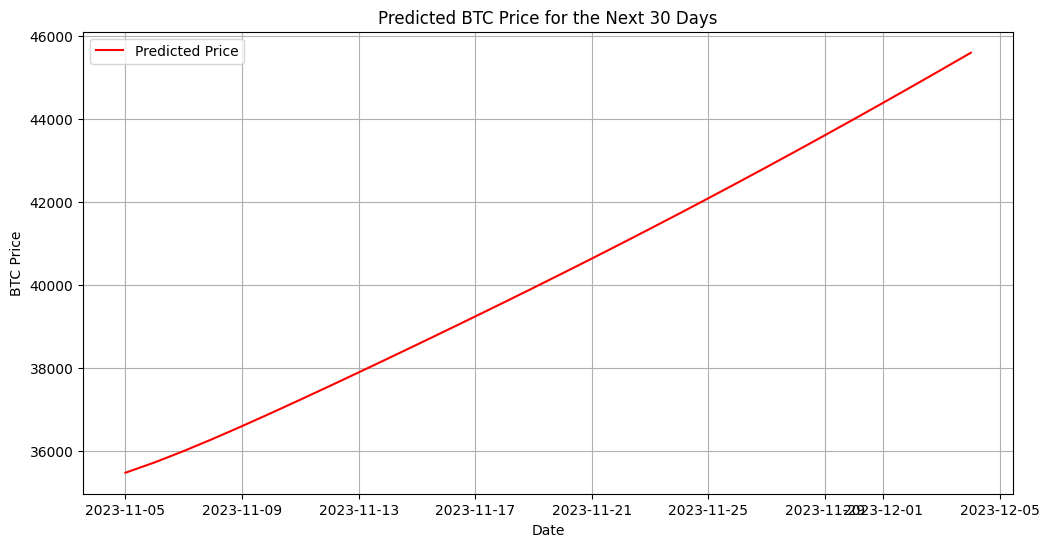

In [13]:
# Plot the predicted prices for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(date_range, predicted_future, label='Predicted Price', color='red')

plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('Predicted BTC Price for the Next 30 Days')
plt.legend()
plt.grid(True)
plt.show()


### According to this model the crypto bull market has started